In [3]:
# @title Setup
from google.colab import auth
from google.cloud import bigquery
from google.colab import data_table

project = 'kfc-kiosk-3' # Project ID inserted based on the query results selected to explore
location = 'US' # Location inserted based on the query results selected to explore
client = bigquery.Client(project=project, location=location)
data_table.enable_dataframe_formatter()
auth.authenticate_user()

## Reference SQL syntax from the original job
Use the ```jobs.query```
[method](https://cloud.google.com/bigquery/docs/reference/rest/v2/jobs/query) to
return the SQL syntax from the job. This can be copied from the output cell
below to edit the query now or in the future. Alternatively, you can use
[this link](https://console.cloud.google.com/bigquery?j=kfc-kiosk-3:US:bquxjob_2f61dd12_18caaafc2ec)
back to BigQuery to edit the query within the BigQuery user interface.

In [4]:
# Running this code will display the query used to generate your previous job

job = client.get_job('bquxjob_33b001e1_18cb281f7cb') # Job ID inserted based on the query results selected to explore
print(job.query)

SELECT * FROM `kfc-kiosk-3.auth_sms.auth_august` 
UNION ALL 
select * except(string_field_6) FROM kfc-kiosk-3.auth_sms.aug_sms_2


# Result set loaded from BigQuery job as a DataFrame
Query results are referenced from the Job ID ran from BigQuery and the query
does not need to be re-run to explore results. The ```to_dataframe```
[method](https://googleapis.dev/python/bigquery/latest/generated/google.cloud.bigquery.job.QueryJob.html#google.cloud.bigquery.job.QueryJob.to_dataframe)
downloads the results to a Pandas DataFrame by using the BigQuery Storage API.

To edit query syntax, you can do so from the BigQuery SQL editor or in the
```Optional:``` sections below.

In [5]:
# Running this code will read results from your previous job

job = client.get_job('bquxjob_33b001e1_18cb281f7cb') # Job ID inserted based on the query results selected to explore
results = job.to_dataframe()
results

,send_time,partner,phone,message,status,get_time
0,12.08.2023 22:50,KFC,7.919738e+10,Ваш код для входа в аккаунт KFC 8749,Доставлено,12.08.2023 22:58
1,12.08.2023 22:50,KFC,7.964950e+10,Ваш код для входа в аккаунт KFC 7546,Доставлено,12.08.2023 22:50
2,12.08.2023 22:50,KFC,7.952728e+10,Ваш код для входа в аккаунт KFC 0557,Доставлено,12.08.2023 22:50
3,12.08.2023 22:50,KFC,7.953561e+10,Ваш код для входа в аккаунт KFC 7045,Доставлено,12.08.2023 22:50
4,12.08.2023 22:50,KFC,7.988563e+10,Ваш код для входа в аккаунт KFC 7894,Доставлено,12.08.2023 22:50
...,...,...,...,...,...,...
1505330,12.08.2023 22:55,KFC,7.961674e+10,Ваш код для входа в аккаунт KFC 8258,Не доставлено,12.08.2023 22:55
1505331,12.08.2023 22:53,KFC,7.967742e+10,Ваш код для входа в аккаунт KFC 2413,Не доставлено,12.08.2023 22:53
1505332,12.08.2023 22:52,KFC,7.985696e+10,Ваш код для входа в аккаунт KFC 6515,Не доставлено,12.08.2023 23:52
1505333,12.08.2023 22:51,KFC,7.988445e+10,Ваш код для входа в аккаунт KFC 2111,Не доставлено,12.08.2023 22:52


## Show descriptive statistics using describe()
Use the ```pandas DataFrame.describe()```
[method](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html)
to generate descriptive statistics. Descriptive statistics include those that
summarize the central tendency, dispersion and shape of a dataset’s
distribution, excluding ```NaN``` values. You may also use other Python methods
to interact with your data.

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
data = results

In [8]:
data

,send_time,partner,phone,message,status,get_time
0,12.08.2023 22:50,KFC,7.919738e+10,Ваш код для входа в аккаунт KFC 8749,Доставлено,12.08.2023 22:58
1,12.08.2023 22:50,KFC,7.964950e+10,Ваш код для входа в аккаунт KFC 7546,Доставлено,12.08.2023 22:50
2,12.08.2023 22:50,KFC,7.952728e+10,Ваш код для входа в аккаунт KFC 0557,Доставлено,12.08.2023 22:50
3,12.08.2023 22:50,KFC,7.953561e+10,Ваш код для входа в аккаунт KFC 7045,Доставлено,12.08.2023 22:50
4,12.08.2023 22:50,KFC,7.988563e+10,Ваш код для входа в аккаунт KFC 7894,Доставлено,12.08.2023 22:50
...,...,...,...,...,...,...
1505330,12.08.2023 22:55,KFC,7.961674e+10,Ваш код для входа в аккаунт KFC 8258,Не доставлено,12.08.2023 22:55
1505331,12.08.2023 22:53,KFC,7.967742e+10,Ваш код для входа в аккаунт KFC 2413,Не доставлено,12.08.2023 22:53
1505332,12.08.2023 22:52,KFC,7.985696e+10,Ваш код для входа в аккаунт KFC 6515,Не доставлено,12.08.2023 23:52
1505333,12.08.2023 22:51,KFC,7.988445e+10,Ваш код для входа в аккаунт KFC 2111,Не доставлено,12.08.2023 22:52


<ipython-input-10-ef2affc89e38>:65: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for date, value in ratio.iteritems():
<ipython-input-10-ef2affc89e38>:82: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


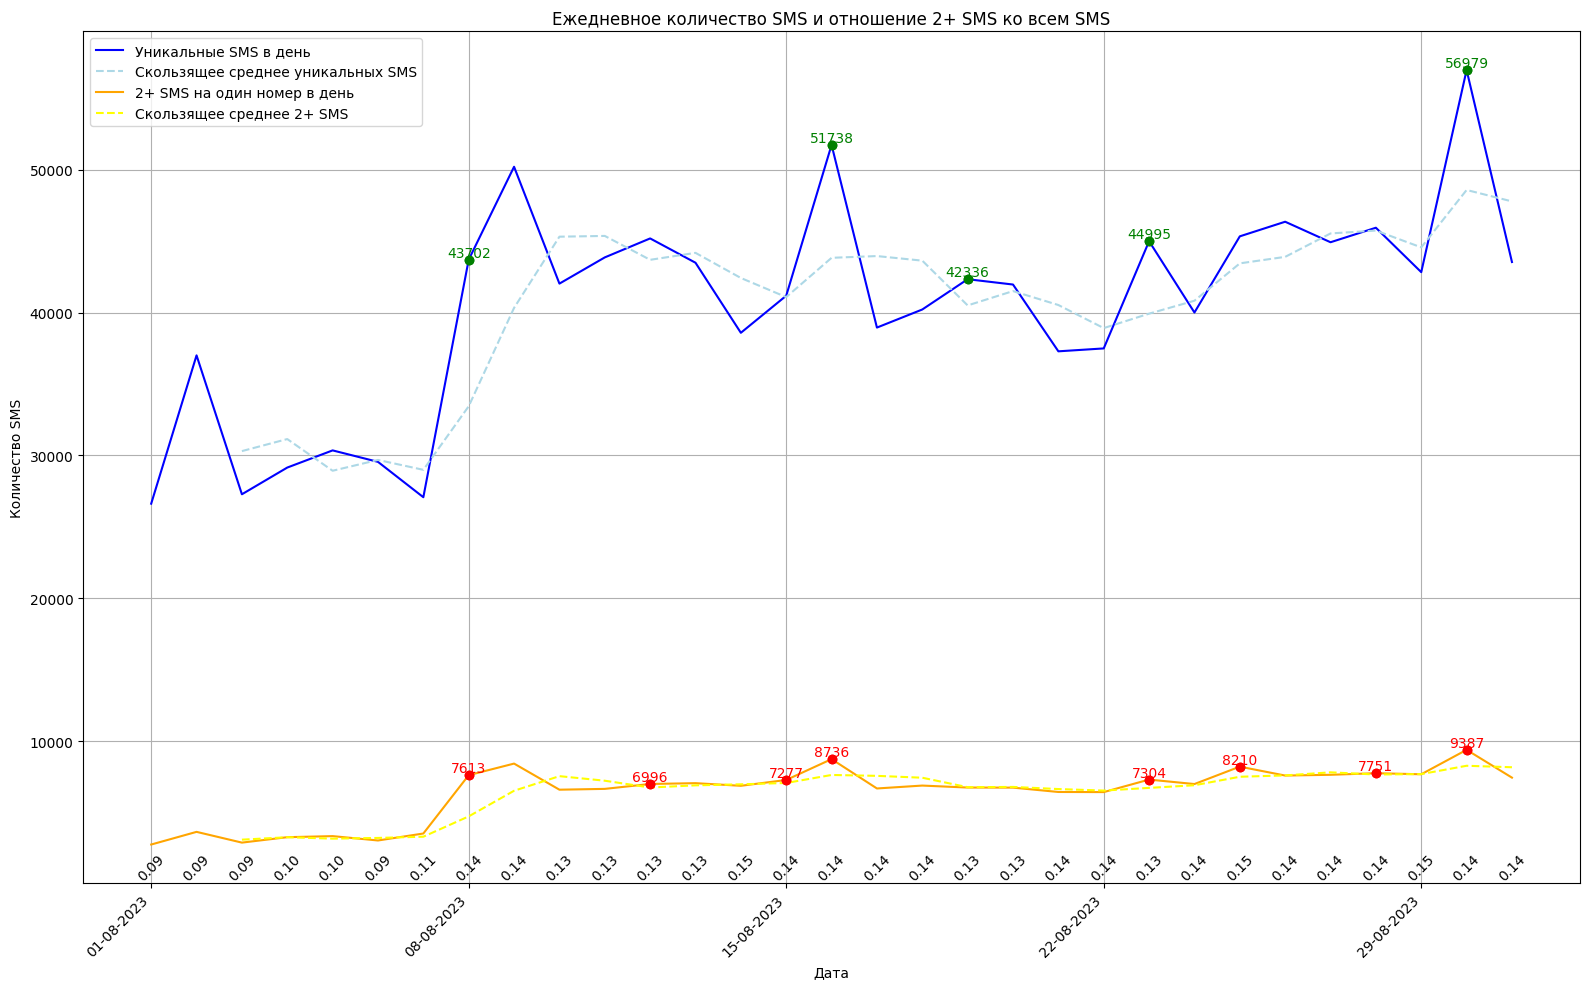

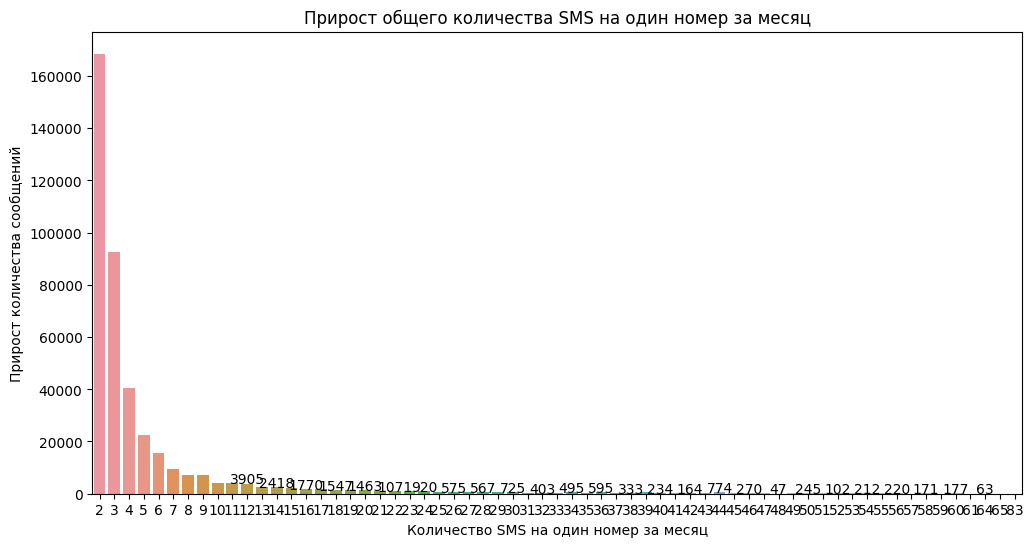

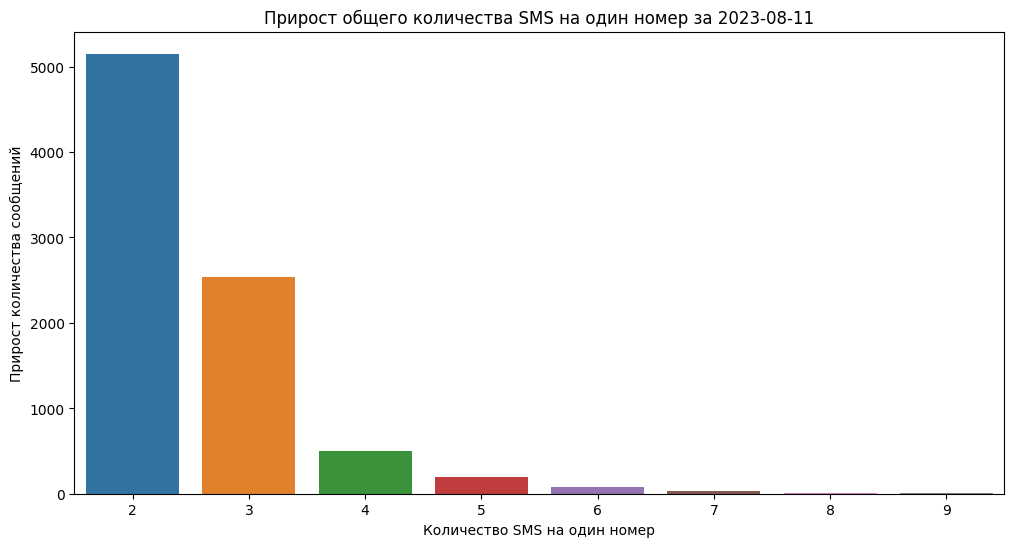

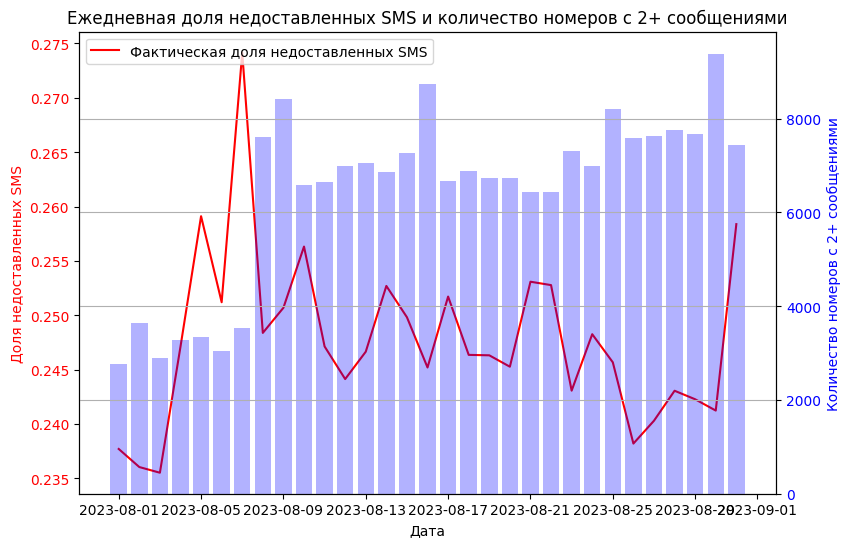

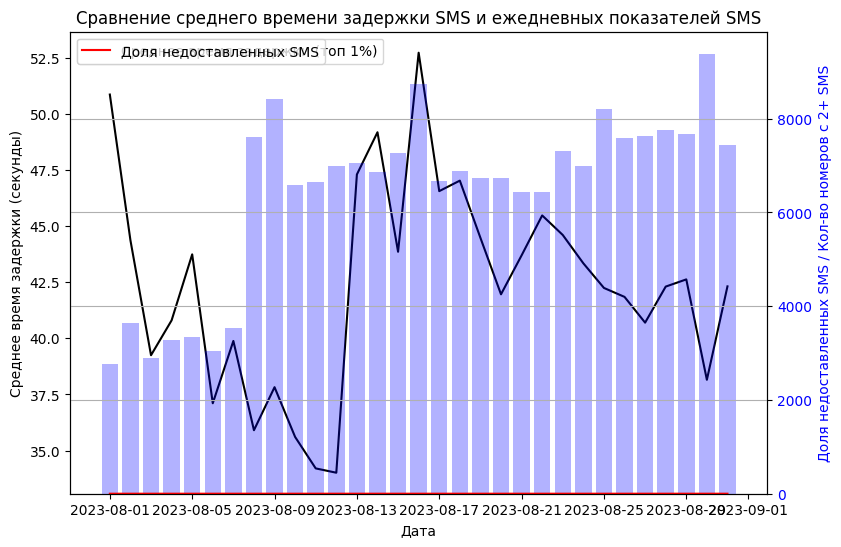

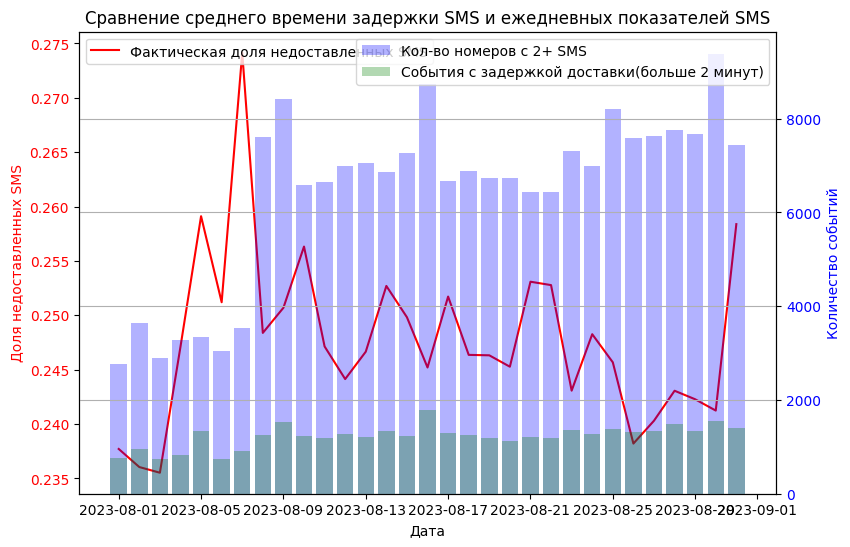

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates

# Преобразование 'send_time' и 'get_time' в формат datetime
data['send_time'] = pd.to_datetime(data['send_time'], format='%d.%m.%Y %H:%M', errors='coerce')
# Подсчет общего количества SMS, отправленных каждый день
daily_auth_counts = data.groupby(data['send_time'].dt.date)['phone'].nunique()
sms_counts_per_day = data.groupby(data['send_time'].dt.date).size()

# Фильтрация данных для поиска случаев, когда одному номеру отправлено 2 или более SMS в один день
multiple_sms = data.groupby([data['send_time'].dt.date, 'phone']).size()
multiple_sms_per_day = multiple_sms[multiple_sms >= 2]

# Подсчет количества таких событий для каждого дня
daily_multiple_sms_counts = multiple_sms_per_day.groupby(level=0).count()

# Расчет скользящего среднего и стандартного отклонения
window_size = 3
rolling_mean_auth = daily_auth_counts.rolling(window=window_size).mean()
rolling_std_auth = daily_auth_counts.rolling(window=window_size).std()

rolling_mean_mult = daily_multiple_sms_counts.rolling(window=window_size).mean()
rolling_std_mult = daily_multiple_sms_counts.rolling(window=window_size).std()

# Определение значительных пиков
threshold_auth = rolling_mean_auth + 0.99 * rolling_std_auth
threshold_mult = rolling_mean_mult + 0.99 * rolling_std_mult

significant_peaks_auth = daily_auth_counts[daily_auth_counts > threshold_auth]

significant_peaks_mult = daily_multiple_sms_counts[daily_multiple_sms_counts > threshold_mult]

# Визуализация

# Adjust subplot layout
fig, ax = plt.subplots(figsize=(16, 10), constrained_layout=True)  # Увеличиваем размер и включаем constrained_layout


# Графики и скользящие средние
sns.lineplot(x=daily_auth_counts.index, y=daily_auth_counts.values, label='Уникальные SMS в день', color='blue')
sns.lineplot(x=rolling_mean_auth.index, y=rolling_mean_auth.values, label='Скользящее среднее уникальных SMS', color='lightblue', linestyle='--')
sns.lineplot(x=daily_multiple_sms_counts.index, y=daily_multiple_sms_counts.values, label='2+ SMS на один номер в день', color='orange')
sns.lineplot(x=rolling_mean_mult.index, y=rolling_mean_mult.values, label='Скользящее среднее 2+ SMS', color='yellow', linestyle='--')

# Отметка значительных пиков
plt.scatter(significant_peaks_auth.index, significant_peaks_auth.values, color='green', zorder=5)
plt.scatter(significant_peaks_mult.index, significant_peaks_mult.values, color='red', zorder=5)

# Отметка значительных пиков и отображение значений пиков
for date, count in significant_peaks_auth.items():
    ax.scatter(date, count, color='green', zorder=5)
    ax.text(date, count, f'{int(count)}', color='green', ha='center', va='bottom')

for date, count in significant_peaks_mult.items():
    ax.scatter(date, count, color='red', zorder=5)
    ax.text(date, count, f'{int(count)}', color='red', ha='center', va='bottom')

# Установка пределов оси X на основе дат в данных


# Расчет отношения
ratio = daily_multiple_sms_counts / sms_counts_per_day
for date, value in ratio.iteritems():
    # Выбор цвета в зависимости от значения
    color = 'red' if value > 0.15 else ('green' if value <= 0.07 else 'black')
    # Отображение текста с правильным цветом
    ax.text(date, ax.get_ylim()[0], f'{value:.2f}', color=color, ha='center', va='bottom', rotation=45)


# Настройка оси X
plt.gca().xaxis.set_major_locator(mdates.WeekdayLocator(interval=1))  # Установка интервала для дат
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))  # Форматирование дат

plt.xticks(rotation=45, ha='right')  # Регулировка вращения и выравнивания подписей дат
plt.title("Ежедневное количество SMS и отношение 2+ SMS ко всем SMS")
plt.xlabel("Дата")
plt.ylabel("Количество SMS")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig('/content/Ежедневное количество SMS и отношение 2+ SMS ко всем SMS.jpg', format='jpg', dpi=300)
plt.show()








monthly_sms_per_user = data.groupby(['phone', data['send_time'].dt.to_period('M')]).size().reset_index(name='sms_count')

# Удаление номеров с одним сообщением в месяц
filtered_data = monthly_sms_per_user[monthly_sms_per_user['sms_count'] > 1]

# Группировка данных по количеству SMS и подсчет общего количества сообщений и пользователей
sms_distribution = filtered_data.groupby('sms_count').agg(
    user_count=('phone', 'size'),
    total_sms=('sms_count', 'sum')
).reset_index()

# Расчет прироста количества SMS
sms_distribution['sms_increase'] = sms_distribution['total_sms'] - sms_distribution['user_count']

# Построение графика
plt.figure(figsize=(12, 6))
barplot = sns.barplot(x='sms_count', y='sms_increase', data=sms_distribution)
plt.xlabel('Количество SMS на один номер за месяц')
plt.ylabel('Прирост количества сообщений')
plt.title('Прирост общего количества SMS на один номер за месяц')

# Добавление подписей сверху столбцов начиная с 12-й группы и далее через каждые две группы
for index, row in sms_distribution.iterrows():
    if row.sms_count >= 12 and row.sms_count % 2 == 0:
        barplot.text(index, row.sms_increase, f'{int(row.sms_increase)}', color='black', ha="center")

plt.savefig('/content/Прирост общего количества SMS на один номер за месяц.jpg', format='jpg', dpi=300)
plt.show()









# Выбор интересующей даты
selected_date = pd.to_datetime("2023-08-11 00:01:00	")

# Фильтрация данных для выбранного дня
daily_data = data[data['send_time'].dt.date == selected_date.date()]

# Группировка данных по номеру телефона, подсчет количества SMS
daily_sms_per_user = daily_data.groupby('phone').size().reset_index(name='sms_count')

# Удаление номеров с одним сообщением
filtered_data = daily_sms_per_user[daily_sms_per_user['sms_count'] > 1]

# Группировка данных по количеству SMS и подсчет общего количества сообщений и пользователей
sms_distribution = filtered_data.groupby('sms_count').agg(
    user_count=('phone', 'size'),
    total_sms=('sms_count', 'sum')
).reset_index()

# Расчет прироста количества SMS
sms_distribution['sms_increase'] = sms_distribution['total_sms'] - sms_distribution['user_count']

# Построение графика
plt.figure(figsize=(12, 6))
barplot = sns.barplot(x='sms_count', y='sms_increase', data=sms_distribution)
plt.xlabel('Количество SMS на один номер')
plt.ylabel('Прирост количества сообщений')
plt.title(f'Прирост общего количества SMS на один номер за {selected_date.strftime("%Y-%m-%d")}')
plt.savefig('/content/Прирост общего количества SMS на один номер.jpg', format='jpg', dpi=300)
plt.show()
data['send_time'] = pd.to_datetime(data['send_time'], format='%d.%m.%Y %H:%M', errors='coerce')

# Подсчет общего количества SMS, отправленных каждый день
sms_counts_per_day = data.groupby(data['send_time'].dt.date).size()

# Подсчет количества недоставленных SMS каждый день
undelivered_counts = data[data['status'] != 'Доставлено'].groupby(data['send_time'].dt.date).size()

# Расчет доли недоставленных SMS
delivery_ratio = undelivered_counts / sms_counts_per_day

# Расчет скользящего среднего для доли недоставленных SMS
window_size = 3
rolling_mean_ratio = delivery_ratio.rolling(window=window_size).mean()

# Подсчет количества номеров с 2+ сообщениями каждый день
multiple_sms_counts = data.groupby([data['send_time'].dt.date, 'phone']).size()
daily_multiple_sms_counts = multiple_sms_counts[multiple_sms_counts >= 2].groupby(level=0).count()

# Визуализация
fig, ax1 = plt.subplots(figsize=(9, 6))

# График доли недоставленных SMS и скользящего среднего
sns.lineplot(x=delivery_ratio.index, y=delivery_ratio.values, label='Фактическая доля недоставленных SMS', color='red', ax=ax1)
#sns.lineplot(x=rolling_mean_ratio.index, y=rolling_mean_ratio.values, label='Скользящее среднее доли недоставленных SMS', color='purple', ax=ax1)

# Настройка оси X
ax1.xaxis.set_major_locator(mdates.AutoDateLocator())
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
ax1.set_xlabel("Дата")
ax1.set_ylabel("Доля недоставленных SMS", color='red')
ax1.tick_params(axis='y', labelcolor='red')
ax1.legend(loc='upper left')

# Добавление второй оси Y для количества номеров с 2+ сообщениями
ax2 = ax1.twinx()
ax2.bar(daily_multiple_sms_counts.index, daily_multiple_sms_counts.values, alpha=0.3, color='blue')
ax2.set_ylabel("Количество номеров с 2+ сообщениями", color='blue')
ax2.tick_params(axis='y', labelcolor='blue')

plt.title("Ежедневная доля недоставленных SMS и количество номеров с 2+ сообщениями")
plt.xticks(rotation=45)
plt.grid(True)
plt.savefig('/content/Ежедневная доля недоставленных SMS и количество номеров с 2+ сообщениями.jpg', format='jpg', dpi=300)
plt.show()
# Преобразование 'send_time' и 'get_time' в формат datetime
data['send_time'] = pd.to_datetime(data['send_time'], format='%d.%m.%Y %H:%M', errors='coerce')
data['get_time'] = pd.to_datetime(data['get_time'], format='%d.%m.%Y %H:%M', errors='coerce')

# Расчет разницы между 'send_time' и 'get_time'
data['time_diff'] = (data['get_time'] - data['send_time']).dt.total_seconds()
top_10_indices = data['time_diff'].nlargest(20000).index

# Удаление записей с этими индексами из DataFrame
data['time_diff'] = data['time_diff'].drop(index=top_10_indices)

# Группировка и отбор 1% самых больших значений разницы времени по каждому дню
top_1_percent_diff = data.groupby(data['send_time'].dt.date)['time_diff'].apply(lambda x: x.nlargest(int(len(x) * 0.2))).reset_index(level=0)

# Расчет среднего значения разницы времени по дням
average_time_diff = top_1_percent_diff.groupby('send_time')['time_diff'].mean()

# Расчет доли недоставленных SMS
delivery_ratio = undelivered_counts / sms_counts_per_day

# Визуализация
fig, ax1 = plt.subplots(figsize=(9, 6))

# График среднего значения разницы времени
sns.lineplot(x=average_time_diff.index, y=average_time_diff.values, label='Среднее время задержки (топ 1%)', color='black', ax=ax1)

# Настройка оси X
ax1.xaxis.set_major_locator(mdates.AutoDateLocator())
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
ax1.set_xlabel("Дата")
ax1.set_ylabel("Среднее время задержки (секунды)", color='black')
ax1.tick_params(axis='y', labelcolor='black')
ax1.legend(loc='upper left')

# Добавление второй оси Y для доли недоставленных SMS и количества номеров с 2+ сообщениями
ax2 = ax1.twinx()
sns.lineplot(x=delivery_ratio.index, y=delivery_ratio.values, label='Доля недоставленных SMS', color='red', ax=ax2)
ax2.bar(daily_multiple_sms_counts.index, daily_multiple_sms_counts.values, alpha=0.3, color='blue')
ax2.set_ylabel("Доля недоставленных SMS / Кол-во номеров с 2+ SMS", color='blue')
ax2.tick_params(axis='y', labelcolor='blue')

plt.title("Сравнение среднего времени задержки SMS и ежедневных показателей SMS")
plt.xticks(rotation=45)
plt.grid(True)
plt.savefig('/content/Сравнение среднего времени задержки SMS и ежедневных показателей SMS.jpg', format='jpg', dpi=300)
plt.show()

# Подсчет количества событий с задержкой доставки для каждого дня
delayed_delivery = data[data['get_time'] - data['send_time'] > '00:02:30'].groupby(data['send_time'].dt.date).size()

# Визуализация
fig, ax1 = plt.subplots(figsize=(9, 6))

# График доли недоставленных SMS и скользящего среднего
sns.lineplot(x=delivery_ratio.index, y=delivery_ratio.values, label='Фактическая доля недоставленных SMS', color='red', ax=ax1)
#sns.lineplot(x=rolling_mean_ratio.index, y=rolling_mean_ratio.values, label='Скользящее среднее доли недоставленных SMS', color='purple', ax=ax1)

# Настройка оси X
ax1.xaxis.set_major_locator(mdates.AutoDateLocator())
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
ax1.set_xlabel("Дата")
ax1.set_ylabel("Доля недоставленных SMS", color='red')
ax1.tick_params(axis='y', labelcolor='red')
ax1.legend(loc='upper left')

# Создание второй оси Y для количества номеров с 2+ сообщениями и событий с задержкой доставки
ax2 = ax1.twinx()
ax2.bar(daily_multiple_sms_counts.index, daily_multiple_sms_counts.values, alpha=0.3, color='blue', label='Кол-во номеров с 2+ SMS')
ax2.bar(delayed_delivery.index, delayed_delivery.values, alpha=0.3, color='green', label='События с задержкой доставки(больше 2 минут)')
ax2.set_ylabel("Количество событий", color='blue')
ax2.tick_params(axis='y', labelcolor='blue')
ax2.legend(loc='upper right')

plt.title("Сравнение среднего времени задержки SMS и ежедневных показателей SMS")
plt.xticks(rotation=45)
plt.grid(True)
plt.savefig('/content/Сравнение среднего времени задержки SMS и ежедневных показателей SMS.jpg', format='jpg', dpi=300)
plt.show()

In [11]:
monthly_sms_per_user = data.groupby(['phone', data['send_time'].dt.to_period('M')]).size().reset_index(name='sms_count')

In [13]:
two_times = monthly_sms_per_user[monthly_sms_per_user.sms_count == 3]
monthly_sms_per_user.sort_values('sms_count', ascending=False).head()

,phone,send_time,sms_count
1022336,7.995552e+10,2023-08,83
142916,7.908138e+10,2023-08,65
284683,7.914763e+10,2023-08,64
226316,7.912526e+10,2023-08,61
328762,7.916859e+10,2023-08,60


In [22]:
data[data.phone == 79125263937.0].sort_values('send_time')

,send_time,partner,phone,message,status,get_time,time_diff
1029737,2023-08-01 06:43:00,KFC,7.912526e+10,Ваш код для входа в аккаунт KFC 3997,Доставлено,2023-08-01 06:43:00,0.0
828489,2023-08-01 07:01:00,KFC,7.912526e+10,Ваш код для входа в аккаунт KFC 5416,Доставлено,2023-08-01 07:01:00,0.0
1131562,2023-08-01 07:19:00,KFC,7.912526e+10,Ваш код для входа в аккаунт KFC 7932,Доставлено,2023-08-01 07:19:00,0.0
998226,2023-08-02 11:11:00,KFC,7.912526e+10,Ваш код для входа в аккаунт KFC 8047,Доставлено,2023-08-02 11:11:00,0.0
796780,2023-08-02 11:30:00,KFC,7.912526e+10,Ваш код для входа в аккаунт KFC 7773,Доставлено,2023-08-02 11:30:00,0.0
...,...,...,...,...,...,...,...
241934,2023-08-31 13:37:00,KFC,7.912526e+10,Ваш код для входа в аккаунт KFC 0117,Доставлено,2023-08-31 13:37:00,0.0
548958,2023-08-31 14:33:00,KFC,7.912526e+10,Ваш код для входа в аккаунт KFC 5064,Доставлено,2023-08-31 14:33:00,0.0
232445,2023-08-31 15:26:00,KFC,7.912526e+10,Ваш код для входа в аккаунт KFC 2292,Доставлено,2023-08-31 15:26:00,0.0
76150,2023-08-31 23:30:00,KFC,7.912526e+10,Ваш код для входа в аккаунт KFC 0834,Доставлено,2023-08-31 23:30:00,0.0


In [15]:
k=0
for phone in two_times.phone[1:1000]:
  if data[data.phone == phone].iloc[0].status == 'Не доставлено' and \
  data[data.phone == phone].iloc[1].status == 'Доставлено' and \
  data[data.phone == phone].time_diff.iloc[0] >= 0:
    k = k+1
    phones = phone


In [16]:
k

11

In [17]:
phones

79013368710.0

In [ ]:
data[data.phone == phone].time_diff.iloc[0] >= 60

In [ ]:
k=0
for phone in two_times.phone[1:50000]:
  if data[data.phone == phone].iloc[0].status == 'Отправлено':
    k = k+1
    phones = phone


In [ ]:
k/50000

In [ ]:
monthly_sms_per_user.sms_count.mean()